In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import ntpath

from sklearn.utils import shuffle

In [2]:
#Lectura en crudo del fichero CSV generado, añadiendo los labels a cada columna
columnas = ['centro', 'izquierda', 'derecha', 'angulo', 'acelerador', 'freno', 'velocidad']
datos = pd.read_csv('driving_log.csv', names = columnas)

#Muestra en pantalla los 5 primeros elementos del fichero
datos.head()

,centro,izquierda,derecha,angulo,acelerador,freno,velocidad
0,C:\Users\webde\Desktop\3v2d\IMG\center_2019_08...,C:\Users\webde\Desktop\3v2d\IMG\left_2019_08_1...,C:\Users\webde\Desktop\3v2d\IMG\right_2019_08_...,0.000000,1.0,0,20.96597
1,C:\Users\webde\Desktop\3v2d\IMG\center_2019_08...,C:\Users\webde\Desktop\3v2d\IMG\left_2019_08_1...,C:\Users\webde\Desktop\3v2d\IMG\right_2019_08_...,-0.150000,1.0,0,21.75763
2,C:\Users\webde\Desktop\3v2d\IMG\center_2019_08...,C:\Users\webde\Desktop\3v2d\IMG\left_2019_08_1...,C:\Users\webde\Desktop\3v2d\IMG\right_2019_08_...,-0.300000,1.0,0,22.31801
3,C:\Users\webde\Desktop\3v2d\IMG\center_2019_08...,C:\Users\webde\Desktop\3v2d\IMG\left_2019_08_1...,C:\Users\webde\Desktop\3v2d\IMG\right_2019_08_...,-0.384107,1.0,0,23.01026
4,C:\Users\webde\Desktop\3v2d\IMG\center_2019_08...,C:\Users\webde\Desktop\3v2d\IMG\left_2019_08_1...,C:\Users\webde\Desktop\3v2d\IMG\right_2019_08_...,-0.190968,1.0,0,23.59531


In [3]:
#Función para obtener la 'hoja' del árbol perteneciente a la ruta absoluta de la imagen, que corresponde con su nombre
def get_tail(path):
  head, tail = ntpath.split(path) #Separando por "/", tail es el último elemento, y head todo lo anterior
  return tail

#Modificación de las 3 primeras columnas, correspondiente a la ruta de las imágenes
datos['centro'] = datos['centro'].apply(get_tail)
datos['izquierda'] = datos['izquierda'].apply(get_tail)
datos['derecha'] = datos['derecha'].apply(get_tail)

#Muestra en pantalla los 5 primeros elementos del fichero, con las rutas ya procesadas
datos.head()

,centro,izquierda,derecha,angulo,acelerador,freno,velocidad
0,center_2019_08_10_22_24_32_972.jpg,left_2019_08_10_22_24_32_972.jpg,right_2019_08_10_22_24_32_972.jpg,0.000000,1.0,0,20.96597
1,center_2019_08_10_22_24_33_041.jpg,left_2019_08_10_22_24_33_041.jpg,right_2019_08_10_22_24_33_041.jpg,-0.150000,1.0,0,21.75763
2,center_2019_08_10_22_24_33_115.jpg,left_2019_08_10_22_24_33_115.jpg,right_2019_08_10_22_24_33_115.jpg,-0.300000,1.0,0,22.31801
3,center_2019_08_10_22_24_33_183.jpg,left_2019_08_10_22_24_33_183.jpg,right_2019_08_10_22_24_33_183.jpg,-0.384107,1.0,0,23.01026
4,center_2019_08_10_22_24_33_256.jpg,left_2019_08_10_22_24_33_256.jpg,right_2019_08_10_22_24_33_256.jpg,-0.190968,1.0,0,23.59531


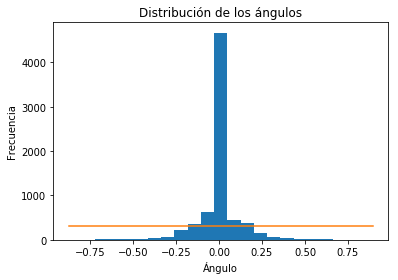

In [4]:
#Definición de las características del histograma
num_bins = 23
max_muestras_por_bin = 300

#Generación del histograma (sus variables serán usadas en la celda siguiente para procesar los elementos sobrantes)
hist, bins = np.histogram(datos['angulo'], num_bins)

#Dibujado del histograma
plt.hist(datos['angulo'], num_bins)

plt.xlabel('Ángulo')
plt.ylabel('Frecuencia')
plt.title("Distribución de los ángulos") 

#Línea representando max_muestras_por_bin sobre el histograma
plt.plot((np.min(datos['angulo']), np.max(datos['angulo'])), (max_muestras_por_bin, max_muestras_por_bin))

plt.show()

In [5]:
#-------------BALANCEO DEL DATASET------------------------

datos_preprocesados = datos.copy() #Copia del dataset original
elementos_a_eliminar = []

#Recorrido de cada bin
for i in range(num_bins):
  lista = []
#Recorrido de cada elemento del dataset: si el ángulo pertenece al bin que estamos recorriendo, lo 
#metemos en la lista
  for j in range(len(datos['angulo'])):
    if datos['angulo'][j] >= bins[i] and datos['angulo'][j] <= bins[i+1]:
      lista.append(j)
    
#Mezclamos los elementos que pertenecen al bin
  lista = shuffle(lista)
  #Nos quedamos con las "sobras" basado en el umbral que hayamos decidido (max_muestras_por_bin), para posteriormente
  #añadirlo a elementos_a_eliminar y utilizarla como lista con los elementos a eliminar en el dataset
  lista = lista[max_muestras_por_bin:]
  elementos_a_eliminar.extend(lista)

#Eliminamos dichos datos del dataset
datos_preprocesados.drop(datos_preprocesados.index[elementos_a_eliminar], inplace=True)

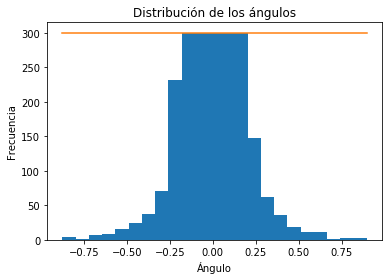

In [6]:
#Representación del histograma del dataset una vez procesado
plt.hist(datos_preprocesados['angulo'], num_bins)

plt.xlabel('Ángulo')
plt.ylabel('Frecuencia')
plt.title("Distribución de los ángulos")

#Línea representando max_muestras_por_bin sobre el histograma
plt.plot((np.min(datos_preprocesados['angulo']), np.max(datos_preprocesados['angulo'])), 
         (max_muestras_por_bin, max_muestras_por_bin))

plt.show()

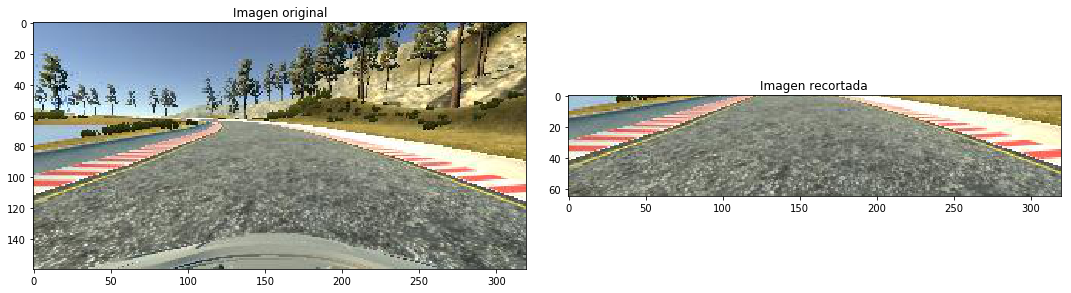

In [7]:
#Función de recortado de un fotograma
def recorte(img):
    img = img[70:135,:,:]
    return img

#Lectura del fotograma de prueba (fotograma_prueba.jpg debe encontrarse en la misma carpeta que este notebook)
imagen_original = mpimg.imread('fotograma_prueba.jpg')

#Uso de la función recorte para recortar el fotograma
imagen_recortada = recorte(imagen_original) 

#Generación conjunta de las imágenes para su comparación
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(imagen_original)
axs[0].set_title('Imagen original')
axs[1].imshow(imagen_recortada)
axs[1].set_title('Imagen recortada')

plt.show()